In [0]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [0]:
from google.colab import drive 
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


(300, 300, 3)


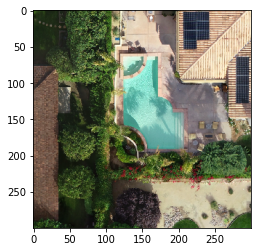

In [0]:
path0 = '/content/gdrive/My Drive/project_files/'
path = path0+'image-chips/'
image = plt.imread(path+'1d4fbe33f3_F1BE1D4184INSPIRE-000000.png')
print(image.shape)
plt.imshow(image)

(300, 300, 3)
[[4 4 4 ... 0 0 0]
 [4 4 4 ... 0 0 0]
 [4 4 4 ... 0 0 0]
 ...
 [2 2 2 ... 4 4 4]
 [2 2 2 ... 4 4 4]
 [2 2 2 ... 4 4 4]]
[0 1 2 3 4]


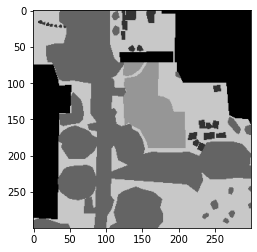

In [0]:
path = path0+'label-chips/'
GT = plt.imread(path+'1d4fbe33f3_F1BE1D4184INSPIRE-000000.png')
print(GT.shape)
image_grount_truth = GT[:,:,0]
GT = np.round(GT*1000)/4
GT = GT.astype('int')
print(GT[:,:,2])
unique_elements = np.unique(GT)
print(unique_elements)

# (075, 025, 230) : BUILDING
# (180, 030, 145) : CLUTTER
# (075, 180, 060) : VEGETATION
# (048, 130, 245) : WATER
# (255, 255, 255) : GROUND
# (200, 130, 000) : CAR
# (255, 000, 255) : IGNORE

plt.imshow(GT*50, cmap='gray')

In [0]:
image_n = image.reshape(image.shape[0]*image.shape[1], image.shape[2])
image_n.shape

(90000, 3)

[[4 4 4 ... 0 0 0]
 [4 4 4 ... 0 0 0]
 [4 4 4 ... 0 0 0]
 ...
 [2 2 2 ... 4 4 4]
 [2 2 2 ... 4 4 4]
 [2 2 2 ... 4 4 4]]
[0 1 2 3 4]
[[4 2 2 ... 3 3 3]
 [4 2 2 ... 3 3 3]
 [4 2 2 ... 3 3 3]
 ...
 [0 0 2 ... 0 0 0]
 [0 0 2 ... 0 0 2]
 [0 0 0 ... 0 0 0]]


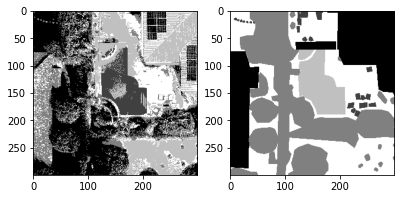

In [0]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, random_state=0).fit(image_n)

labels = kmeans.labels_
image_segmented = np.reshape(labels, (image.shape[0] , image.shape[1]))

fig1 = plt.figure(figsize=(10,20))  # create a figure object
ax = fig1.add_subplot(1, 3, 1)  # create an axes object in the figure
ax.imshow(image_segmented*40 , cmap='gray')
ax = fig1.add_subplot(1, 3, 2)  # create an axes object in the figure
ax.imshow(GT[:,:,2]*40  , cmap='gray')
# BUILDING:0, CLUTTER:1 , VEGETATION:2, WATER:3, GROUND:4, CAR:5, IGNORE:6

print(GT[:,:,2])
unique_elements = np.unique(GT)
print(unique_elements)
print(image_segmented)

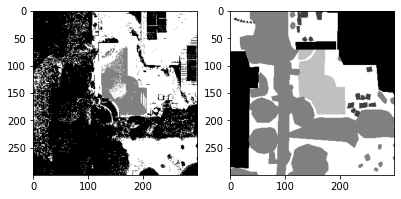

In [0]:
image_segmented_new = np.zeros(image_segmented.shape)
idx = image_segmented==4
image_segmented_new[idx] = 4
idx = image_segmented==0
image_segmented_new[idx] = 2
idx = image_segmented==1
image_segmented_new[idx] = 3
idx = image_segmented==3
image_segmented_new[idx] = 4
idx = image_segmented==2
image_segmented_new[idx] = 2

image_segmented_new = image_segmented_new.astype(int)
fig1 = plt.figure(figsize=(10,20))  # create a figure object
ax = fig1.add_subplot(1, 3, 1)  # create an axes object in the figure
ax.imshow(image_segmented_new*40 , cmap='gray')
ax = fig1.add_subplot(1, 3, 2)  # create an axes object in the figure
ax.imshow(GT[:,:,0]*40  , cmap='gray')
# BUILDING:0, CLUTTER:1 , VEGETATION:2, WATER:3, GROUND:4, CAR:5, IGNORE:6

In [0]:
from skimage.color import rgb2gray
from skimage.metrics import (adapted_rand_error,variation_of_information)

gray_original = rgb2gray(image)

# compute metrics
Grount_truth_matrix = GT[:,:,0]
# print(Grount_truth_matrix.shape)
# print(gray_original.shape)
# print(Grount_truth_matrix)
# print(image_segmented_new)

error, precision, recall = adapted_rand_error(Grount_truth_matrix, image_segmented_new)
print("\nK-means:")
print("Error: " , error*100)
print("precision: " , precision*100)
print("recall: " , recall*100)
splits, merges = variation_of_information(Grount_truth_matrix, image_segmented_new)


from sklearn.metrics import accuracy_score
ACC = accuracy_score(Grount_truth_matrix.reshape(Grount_truth_matrix.shape[0]*Grount_truth_matrix.shape[1]), 
                     image_segmented_new.reshape(image_segmented_new.shape[0]*image_segmented_new.shape[1]))
print("ACC: " , ACC*100)


K-means:
Error:  38.80219179717444
precision:  65.83226053437608
recall:  57.17295287218184
ACC:  55.666666666666664
